<a href="https://colab.research.google.com/github/gvozdila/kaggle-xray/blob/FastAI/FastAI_xray_f1Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install --user ../input/fastaimaster/torch-1.9.0-cp37-cp37m-manylinux1_x86_64.whl
!pip install -U fastai


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /input/fastaimaster/torch-1.9.0-cp37-cp37m-manylinux1_x86_64.whl
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/input/fastaimaster/torch-1.9.0-cp37-cp37m-manylinux1_x86_64.whl'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 213 kB 28.3 MB/s 
     |████████████████████████████████| 61 kB 10.2 MB/s 
  Attempting uninstall: fastcore
    Found existing installation: fastcore 1.4.4
    Uninstalling fastcore-1.4.4:
      Successfully uninstalled fastcore-1.4.4
  Attempting uninstall: fastai
    Found existing installation: fastai 2.6.3
    Uninstalling fastai-2.6.3:
      Successfully uninstalled fastai-2.6.3


In [1]:
import fastcore
import fastai
print(f'fastcore version {fastcore.__version__} installed.')
print(f'fastai version {fastai.__version__} installed.')

fastcore version 1.4.5 installed.
fastai version 2.7.3 installed.


In [ ]:
#Когда будем юзать fastai2.medical.imaging , пока не используется
#!pip install pydicom kornia opencv-python scikit-image

In [2]:
import pandas as pd
%matplotlib inline

In [ ]:
#!pip install --no-cache-dir -I pillow
#еще один костыль.Если  ругается,типа AttributeError: module 'PIL.Image' has no attribute 'Resampling',раскомментировать и выполнить один раз

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.1 MB 7.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
from fastai import *
from fastai.vision.all import *


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -j /content/drive/MyDrive/train_xray.zip -d /content/drive/MyDrive/train_xray

Archive:  /content/drive/MyDrive/train_xray.zip
  inflating: /content/drive/MyDrive/train_xray/1.2.826.0.1.3680043.8.498.49042731076391847359377797243991936549-c.bone.jpg  
  inflating: /content/drive/MyDrive/train_xray/1.2.826.0.1.3680043.8.498.49042731076391847359377797243991936549-c.jpg  
  inflating: /content/drive/MyDrive/train_xray/1.2.826.0.1.3680043.8.498.21739376742858908135232935836921176201-c.jpg  
  inflating: /content/drive/MyDrive/train_xray/1.2.826.0.1.3680043.8.498.21739376742858908135232935836921176201-c.bone.jpg  
  inflating: /content/drive/MyDrive/train_xray/1.2.826.0.1.3680043.8.498.52369662527230429679937679591560328077-c.bone.jpg  
  inflating: /content/drive/MyDrive/train_xray/1.2.826.0.1.3680043.8.498.52369662527230429679937679591560328077-c.jpg  
  inflating: /content/drive/MyDrive/train_xray/1.2.826.0.1.3680043.8.498.45545811527291099594261899260114531910-c.jpg  
  inflating: /content/drive/MyDrive/train_xray/1.2.826.0.1.3680043.8.498.455458115272910995942618

In [5]:
item_tfms = [Resize(224)]
batch_tfms = Normalize.from_stats(*imagenet_stats) 

In [6]:
train_path='/content/drive/MyDrive/train_xray'
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')[['SOPInstanceUID', 'Target']]
train_df['Target'] = train_df['Target'].apply(lambda x: x.strip())





In [7]:
train_df

,SOPInstanceUID,Target
0,1.2.826.0.1.3680043.8.498.10025629581362719970278200333618114258,0
1,1.2.826.0.1.3680043.8.498.10036150326276641158002573300029848125,15
2,1.2.826.0.1.3680043.8.498.10038426859954986240523417641213777162,12
3,1.2.826.0.1.3680043.8.498.10050991192143676483577217922037244257,14
4,1.2.826.0.1.3680043.8.498.10053309524595490852815579052225336016,3
...,...,...
1733,1.2.826.0.1.3680043.8.498.99711016467406172920578985719244800351,14
1734,1.2.826.0.1.3680043.8.498.99727280485333900933067489723088200708,11
1735,1.2.826.0.1.3680043.8.498.99935008698914755885142961280499046059,3
1736,1.2.826.0.1.3680043.8.498.99969671777553755311455387279891445345,2


In [18]:
dls = ImageDataLoaders.from_df(train_df,
                               path=train_path, 
                               suff='-c.jpg',
                               item_tfms=item_tfms,
                               batch_tfms=batch_tfms, 
                               shuffle=True, 
                               bs=64, 
                               valid_pct=0.2,
                               label_delim=' ',# !важно! - предупреждаем нейросеть,что у нас есть некоторая multi-label problem
                                               # без этого будет вываливаться ошибка при обучении cnn
                               )

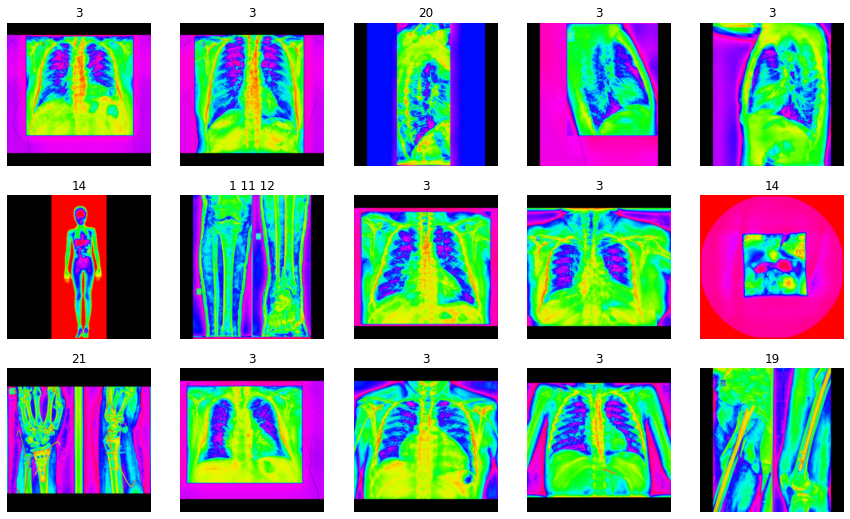

In [ ]:
dls.train.show_batch(max_n=15)


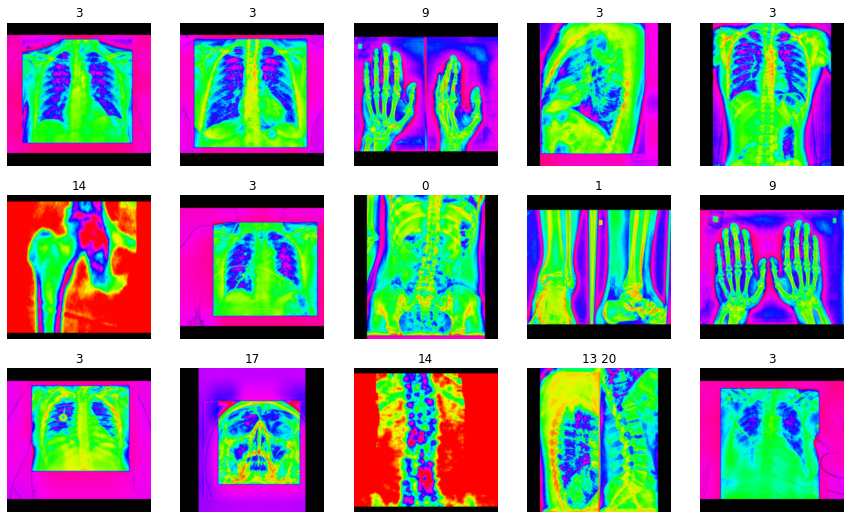

In [ ]:
dls.valid.show_batch(max_n=15)

In [23]:
#Чтобы корректно считалась метрика F1Score, взял с public kernel этого Kaggle-соревнования.
f1_macro = F1ScoreMulti(thresh=0.5, average='macro')
f1_samples = F1ScoreMulti(thresh=0.5, average='samples')
f1_micro = F1ScoreMulti(thresh=0.5, average='micro')
f1_weighted = F1ScoreMulti(thresh=0.5, average='weighted')



In [25]:
learn = vision_learner(dls, resnet50, 
                    metrics=[partial(accuracy_multi, thresh=0.5), f1_macro, f1_samples, f1_micro, f1_weighted]
                    )

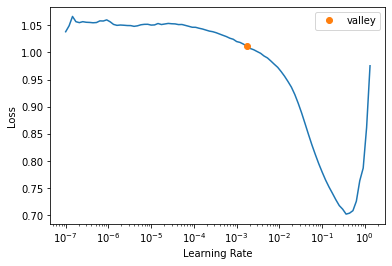

In [26]:
lr = learn.lr_find() 

In [27]:
learn.fine_tune(60, lr[0])

epoch,train_loss,valid_loss,accuracy_multi,f1_score,f1_score,f1_score,f1_score,time
0,0.960465,0.729557,0.582002,0.163783,0.187977,0.182424,0.444012,00:21


epoch,train_loss,valid_loss,accuracy_multi,f1_score,f1_score,f1_score,f1_score,time
0,0.827890,0.653678,0.638591,0.174257,0.214057,0.203752,0.459081,00:28
1,0.798992,0.629630,0.649201,0.182104,0.219328,0.209096,0.470028,00:22
2,0.774027,0.611455,0.678543,0.195324,0.242105,0.225379,0.488246,00:21
3,0.750440,0.584904,0.706969,0.209628,0.264597,0.241438,0.501268,00:22
4,0.723439,0.553155,0.742861,0.223281,0.295283,0.265069,0.514208,00:27
5,0.696185,0.514306,0.787791,0.251205,0.337448,0.302326,0.539831,00:29
6,0.660578,0.482299,0.831805,0.287961,0.433896,0.355422,0.572691,00:28
7,0.621043,0.444201,0.873985,0.322810,0.512599,0.421179,0.597424,00:28
8,0.576387,0.380930,0.920487,0.408758,0.635978,0.536995,0.663705,00:29
9,0.523437,0.316276,0.956117,0.520124,0.736272,0.672532,0.727389,00:29


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fac7529a0e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fac7529a0e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

In [29]:
#посмотрим топ-ошибок.
#interp = ClassificationInterpretation.from_learner(learn)
#interp.plot_top_losses(9, figsize=(15, 10))

In [ ]:
#learn.predict("../input/1.2.826.0.1.3680043.8.498.10000428974990117276582711948006105617.jpg")

In [30]:
learn.export()
learn.save('psycho_model') 

Path('/content/drive/MyDrive/train_xray/models/psycho_model.pth')